# 決定木

## 事前枝刈りによるcancerデータの分類

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)  # 深さを4に制限
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### 決定木の可視化

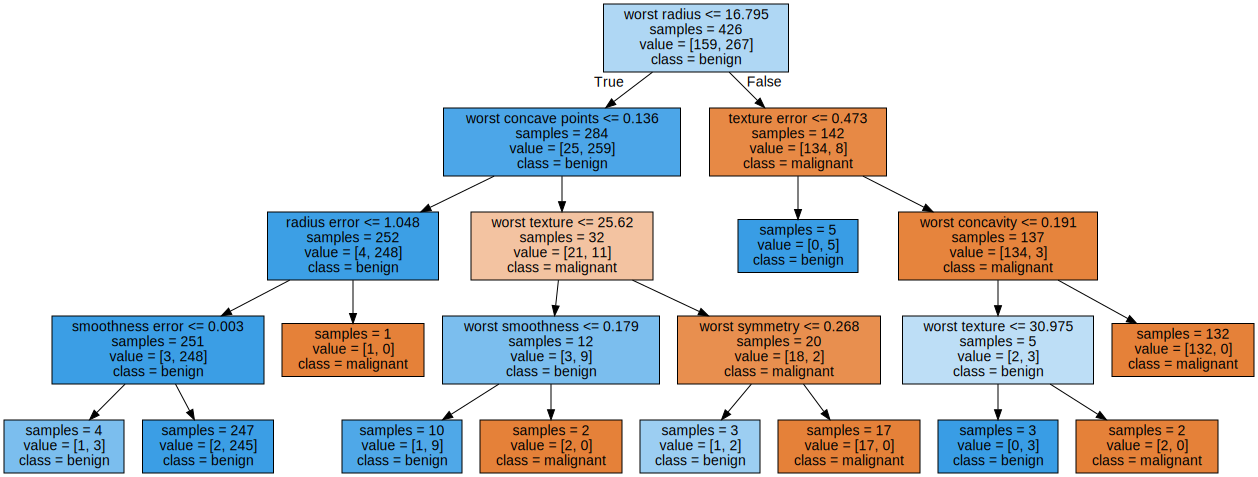

In [2]:
from sklearn.tree import export_graphviz
import graphviz


export_graphviz(
    tree,
    out_file="tree.dot",
    class_names=["malignant", "benign"],
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True,
)

# .dotファイルを読み込み、グラフを表示
with open("/workspaces/machine-learning-with-python/ch02/tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 決定木における要素別重要度

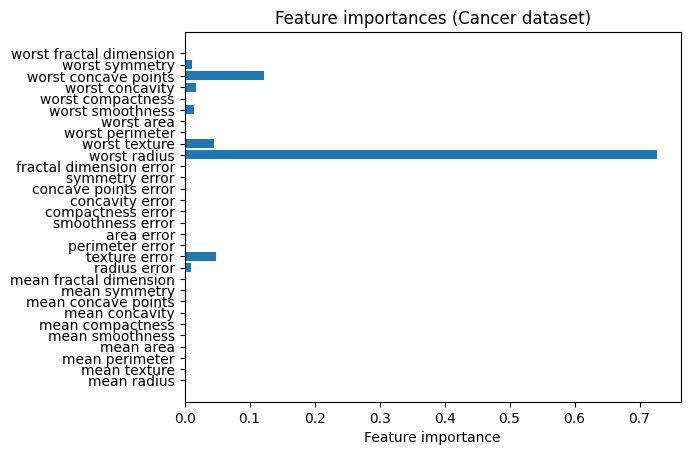

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.title("Feature importances (Cancer dataset)")
    plt.show()


plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


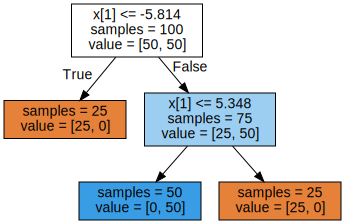

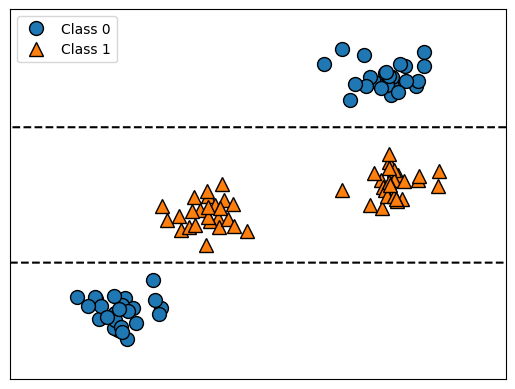

In [6]:
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)